## Libraries

As usual, a couple of libraries are required. 

[Matplotlib](https://python-graph-gallery.com/matplotlib/) and [Seaborn](https://python-graph-gallery.com/seaborn/) are the most common libraries when it comes to visualize data with **Python**. In this example, `seaborn` will be used to create most of the figure, and `matplotlib` will just allow to customize the axes and the grid.

`pandas` is a very handy library used for data wrangling.

In [1]:
# libraries & dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

The dataset is stored [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/sqa_data.csv). It can be loaded into our working environment thanks to the `read.csv()` function of `pandas`.

It is a data frame with 2 columns. `name` provides the group the data point is assigned to. `dist` provides a numerical value for the data point.

In [2]:
path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/sqa_data.csv'
data = pd.read_csv(path)

Now, `data` is an object containing our dataset. We are ready to start the plot.

## Color palette

In this example I suggest to pick color **manually** since only 3 groups are to be displayed. 

The code below builds 2 `dict`. The first one, `swarmplot_palette`, setup the colors for the dots that will appear over the violin chart. `violin_palette` setup 3 darker colors for the violin shapes below.

In [3]:
# Palettes for the areas and the datapoints 
# Light colors for the dots
swarmplot_palette = {'Sqa_par':'#8f96bf', 'Sqa_bif':'#ebb0e5', 'Sqa_zz':'#9feed3'}

# Dark colors for the violin
violin_palette = {'Sqa_par':'#333c70', 'Sqa_bif':'#90367c', 'Sqa_zz':'#34906c'}

## Violin

A [violin chart](https://python-graph-gallery.com/violin-plot/) shows the **distribution** of each group as a **density**. It is straightforward to build with seaborn thanks to its `violinplot()` function.

The [violin plot section](https://python-graph-gallery.com/violin-plot/) of the gallery displays many examples with both `seaborn` and `matplotlib`. In the code below, the `palette` option is used to call the `violin_palette` we built just before.

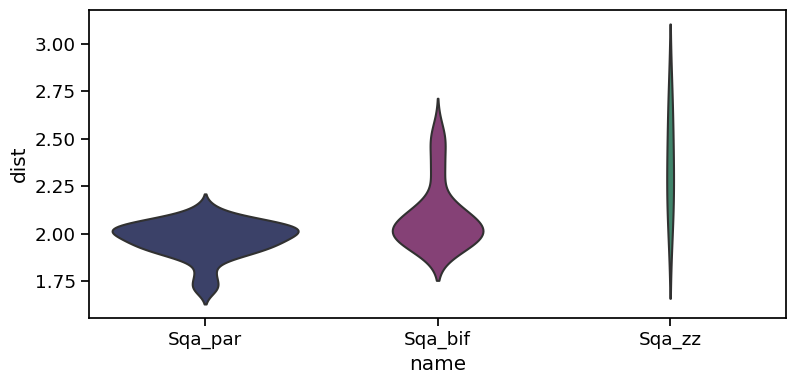

In [7]:
# create figure and seaborn context
sns.set_context('notebook', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,4))

# Plot the violin
ax = sns.violinplot(y="dist", 
                    x="name", 
                    data=data,
                    palette=violin_palette,
                    scale='count',
                    inner=None
              )

plt.show()

That's it 🔥!

Now, let's improve the quality of this chart by showing **individual observations** on top of each shape.

## Beeswarm on top

A [violin chart](https://www.data-to-viz.com/graph/violin.html#:~:text=Violin%20plot%20allows%20to%20visualize,violin%20is%20for%20that%20range.) is a powerful way to compare distribution across groups. 

However, it is important to understand the it **hides the individual observations** which can be misleading. For instance, if a group has only 10 observations and another has 10000, it will be impossible to guess.

Adding individual data points on top of the figure is a very good way to avoid this issue. The beeswarm chart is a dataviz technique that slightly shifts data points to avoid overlaps. It can easily be created thanks to the `swarmplot` of `seaborn`. The code below shows how to do it.

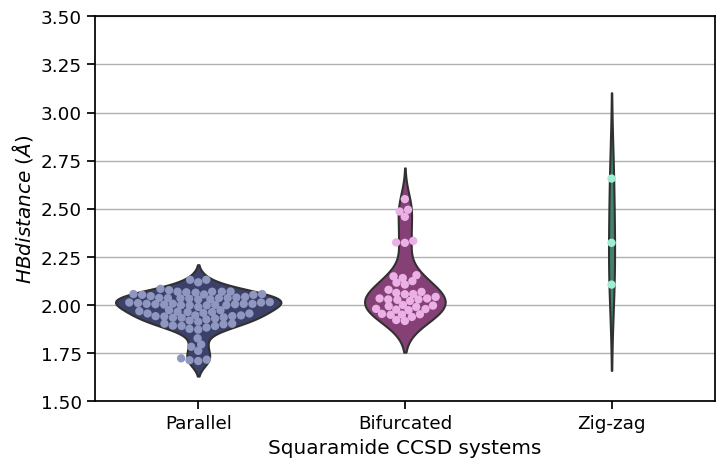

In [9]:
# create figure and seaborn context
sns.set_context('notebook', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,5))

# Plot the violin
ax = sns.violinplot(y="dist", 
                    x="name", 
                    data=data,
                    palette=violin_palette,
                    scale='count',
                    inner=None
              )

# Plot the swarmplot on top 
ax = sns.swarmplot(y="dist",
                   x="name",
                   data=data, 
                   color="white", 
                   edgecolor="gray",
                   s=6, # Circle size
                   palette=swarmplot_palette
             )

# Change axis labels, ticks and title
ax.set_xticks([0, 1, 2], ['Parallel','Bifurcated','Zig-zag'])
ax.set_xlabel('Squaramide CCSD systems')
ax.set_ylabel(r'$HB distance\ (\AA)$')
plt.ylim(1.5, 3.5)

# Add horizontal grid
ax.grid(axis='y')
ax.set_axisbelow(True)

plt.show()

That's it, a clean **violin charts** with individual data points represented as a **beeswarm**!

There are many other way to represent this kind of dataset. You should probably take a look at the [boxplot](https://python-graph-gallery.com/boxplot/) or the [violin](https://python-graph-gallery.com/violin-plot/) sections of the gallery!

## Going further

This post explains how to build a [violin chart](https://python-graph-gallery.com/violin-plot/) with individual **data points on top**.

You might be interested in [adding number of observations in violin plot](https://python-graph-gallery.com/58-show-number-of-observation-on-violinplot/). You can also check out this beautiful [violin chart with statistics on top](https://python-graph-gallery.com/web-ggbetweenstats-with-matplotlib/).